In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import linear_model
!pip install mlxtend --upgrade
from mlxtend.evaluate import bias_variance_decomp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [2]:
df=pd.read_csv('/content/house price.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df.columns=['no','date','age','nearest_st','stores','latitdude','longitude','price_unit']
df.head()

,no,date,age,nearest_st,stores,latitdude,longitude,price_unit
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.duplicated().value_counts()

False    414
dtype: int64

In [15]:
df.corr()

,no,date,age,nearest_st,stores,latitdude,longitude,price_unit,day,year,month
no,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587,-0.055336,0.007379,-0.057145
date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491,0.052386,0.817201,-0.296851
age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,0.057987,0.049171,-0.061966
nearest_st,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,-0.102256,0.016519,0.040796
stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,0.133424,-0.005586,0.025534
latitdude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,0.134413,0.008118,0.017642
longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,0.031796,0.013177,-0.062710
price_unit,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,0.034092,0.081545,-0.047130
day,-0.055336,0.052386,0.057987,-0.102256,0.133424,0.134413,0.031796,0.034092,1.000000,-0.036533,0.122766
year,0.007379,0.817201,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545,-0.036533,1.000000,-0.789638


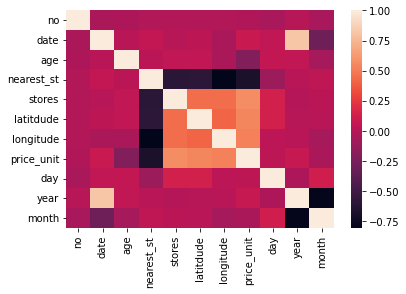

In [37]:
sns.heatmap(df.corr())

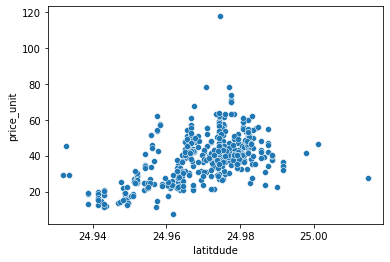

In [6]:
sns.scatterplot(x=df['latitdude'],y=df['price_unit'],data=df)

In [35]:
x=df[['stores','latitdude','longitude','day','year']].values
y=df['price_unit'].values

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=3)
x_poly=poly_reg.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.33,random_state=1)
LR_model=linear_model.LinearRegression()
LR_model.fit(x_train,y_train)

avg_loss, avg_bais, avg_variance = bias_variance_decomp(LR_model,x_train,y_train,x_test,y_test, loss = 'mse', random_seed=32, num_rounds=200)

print('Average Loss = ', avg_loss)
print('Average bais = ', avg_bais)
print('Average variance = ', avg_variance)

Average Loss =  196.26443585918733
Average bais =  110.41725223316575
Average variance =  85.84718362602153


In [12]:
from datetime import datetime, timedelta

Timestamp('2013-08-01 19:04:48.000003')

In [13]:
x=np.array(df['date'])
def date_format(x):
  z=[]
  for i in range(len(x)):
    start=x[i]
    year = int(start)
    rem = start - year

    base = datetime(year, 1, 1)
    result = base + timedelta(seconds=(base.replace(year=base.year + 1) - base).total_seconds() * rem)
    z.append(pd.to_datetime(result))
  return z  

In [14]:
df['new_date']=date_format(x)
df['day']=df['new_date'].dt.weekday
df['year']=pd.DatetimeIndex(df['new_date']).year
df['month']=pd.DatetimeIndex(df['new_date']).month
df
#df['new_date']=df['date'].map(date_format)

,no,date,age,nearest_st,stores,latitdude,longitude,price_unit,new_date,day,year,month
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012-12-01 14:55:40.799997,5,2012,12
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012-12-01 14:55:40.799997,5,2012,12
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013-08-01 19:04:48.000003,3,2013,8
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013-07-02 12:00:00.000000,1,2013,7
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012-10-31 21:04:19.200003,2,2012,10
...,...,...,...,...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013-01-01 00:00:00.000000,1,2013,1
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,2012-09-01 02:55:40.799997,5,2012,9
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,2013-04-02 06:00:00.000000,1,2013,4
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,2013-01-01 00:00:00.000000,1,2013,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


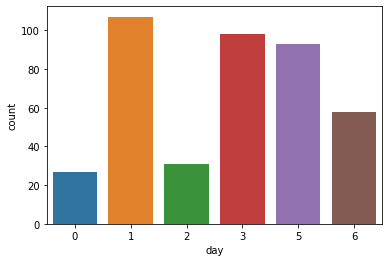

In [ ]:
sns.countplot(df['day'])